In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

didiersalazar_lab2_dataset_path = kagglehub.dataset_download('didiersalazar/lab2-dataset')
didiersalazar_pictures_path = kagglehub.dataset_download('didiersalazar/pictures')
didiersalazar_google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')


Data source import complete.


In [ ]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
langchain-community 0.3.7 requires numpy<2,>=1; python_version < "3.12", but you

In [ ]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest 
pulling 74701a8c35f6... 100% ▕▏ 1.3 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 4f659a1e86d7... 100% ▕▏  485 B                         
verifying sha256 digest 
writing manifest 
success 


In [ ]:
#Download model llama 3.2
!ollama pull llama3.2

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest 
pulling dde5aa3fc5ff... 100% ▕▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 56bb8bd477a5... 100% ▕▏   96 B                         
pulling 34bb5ab01051... 100% ▕▏  561 B                         
verifying sha256 digest 
writing manifest 
success 


In [ ]:
#Download model llava-phi3
!ollama pull llava-phi3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest 
pulling 377876be20ba... 100% ▕▏ 2.3 GB                         
pulling 004fc0969720... 100% ▕▏ 607 MB                         
pulling c608dc615584... 100% ▕▏  149 B                         
pulling cadf483f03b5... 100% ▕▏  155 B                         
pulling 3921dac664c1... 100% ▕▏  492 B                         
verifying sha256 digest 
writing manifest 
success 


In [ ]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.6.0


# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic0.png?raw=true)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

count_vect_train = CountVectorizer()
train_matrix = count_vect_train.fit_transform(train_df['text'])
train_term_frequencies = train_matrix.sum(axis=0).A1
train_terms = count_vect_train.get_feature_names_out()

# 將詞語和頻率轉換為 DataFrame
train_df_terms = pd.DataFrame({
    'Term': train_terms,
    'Frequency': train_term_frequencies
}).sort_values(by='Frequency', ascending=False).head(30)

fig_train = px.bar(train_df_terms,
                   x='Term', y='Frequency',
                   title='Top 30 Terms in Training Dataset by Frequency',
                   labels={'Term': 'Term', 'Frequency': 'Frequency'},
                   template='plotly')
fig_train.update_layout(xaxis_tickangle=-45, width=1000, height=600)
fig_train.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


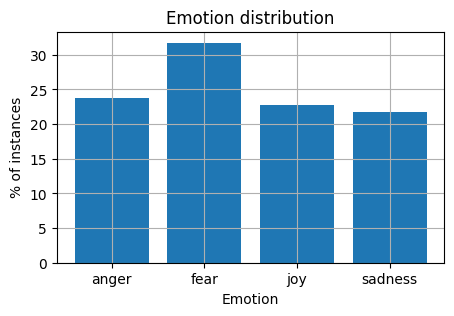

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [ ]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [ ]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [ ]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# 初始化 TF-IDF，限制特徵數量為 1000，並轉換
tfidf_vect = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vect.fit_transform(train_df['text'])

# 獲取所有的特徵名稱
feature_names = tfidf_vect.get_feature_names_out()

# 顯示特徵名稱
print("Features [100:110]:", feature_names[100:110])

Features [100:110]: ['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'joy', 'joy', 'joy', 'fear', 'fear', 'sadness', 'fear',
       'joy', 'sadness'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

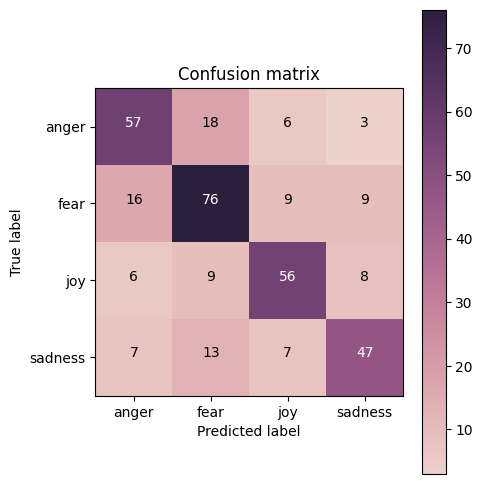

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
Accuracy Results Interpretation:

    The training accuracy (acc_train) and testing accuracy (acc_test) respectively reflect the model's classification performance on the training and testing datasets.

Confusion Matrix Results Interpretation:

    The confusion matrix provides more detailed classification results, showing the correspondence between true labels and predicted labels for each category.

Values on the diagonal:

    Represent the number of correctly classified samples. Higher values indicate better classification performance.

Values off the diagonal:

    Represent the number of misclassified samples. Higher values indicate that a category is more likely to be confused with other categories.
Overall Meaning:

Accuracy provides an overall view of the classification performance, helping to quickly understand the model's accuracy.
The confusion matrix offers a more granular analysis of classification results, helping to identify the causes of misclassification.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Training Accuracy: 0.87
Testing Accuracy: 0.77

Classification Report (Testing):
              precision    recall  f1-score   support

       anger       0.79      0.71      0.75        84
        fear       0.68      0.91      0.78       110
         joy       0.87      0.75      0.80        79
     sadness       0.85      0.64      0.73        74

    accuracy                           0.77       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.77      0.77       347



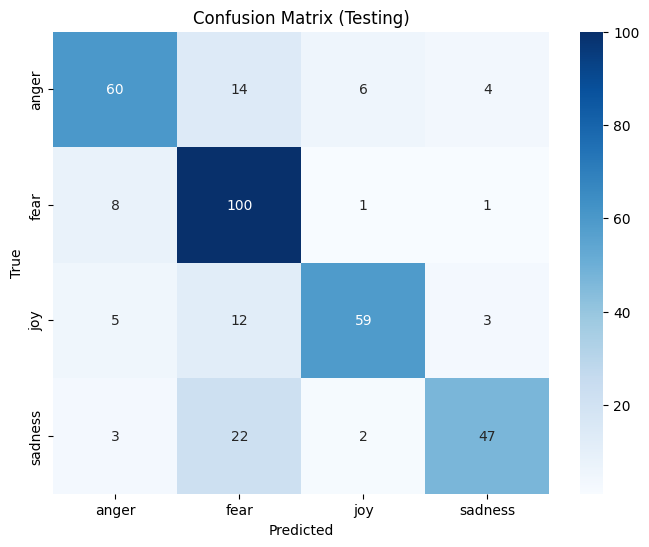

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 Naive Bayes 模型
nb_model = MultinomialNB()

# TF-IDF
X_train_tfidf = tfidf_vect.fit_transform(train_df['text'])
X_test_tfidf = tfidf_vect.transform(test_df['text'])

# train
nb_model.fit(X_train_tfidf, y_train)

# test
y_train_pred = nb_model.predict(X_train_tfidf)
y_test_pred = nb_model.predict(X_test_tfidf)

# 計算準確率
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy: {:.2f}'.format(acc_train))
print('Testing Accuracy: {:.2f}'.format(acc_test))

# 打印分類報告
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred, target_names=['anger', 'fear', 'joy', 'sadness']))

# 繪製混淆矩陣
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sadness'], yticklabels=['anger', 'fear', 'joy', 'sadness'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing)')
plt.show()


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here

---Accuracy and Misclassification:

The Naive Bayes model shows a higher level of confusion between fear and sadness (e.g., 22 samples of sadness misclassified as fear).

The Decision Tree model handles the separation between fear and sadness better, with fewer misclassifications across categories.

---Performance on Specific Classes:

Naive Bayes achieves perfect classification for fear (100 correct predictions), reflecting its ability to handle well-separated features for this emotion.

The Decision Tree model demonstrates balanced performance across all classes, especially with less bias toward specific categories.

--Handling of Overlap in Data:

Naive Bayes struggles with overlapping classes, leading to significant misclassification for sadness and fear.
Decision Tree can better manage overlaps due to its hierarchical decision-making process, although it may overfit the training data in some scenarios.

Interpretation of Results:
Naive Bayes:

Excels in well-separated classes (fear) but struggles with overlapping categories (sadness and fear).
Suitable for datasets where independence assumptions approximately hold and there are distinct feature patterns for each class.
Decision Tree:

Balances performance across all categories, making it more robust in handling overlapping or correlated features.
Suitable for datasets with complex decision boundaries or feature interactions, as it can model these effectively.
Recommendations:
Use Naive Bayes for quick baseline modeling or when data features are likely independent.
Opt for Decision Trees when feature interactions are significant or when interpretability is key.


## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic1.png?raw=true)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
import keras

In [ ]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2266        joy
33        anger
3192    sadness
2270        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic2.png?raw=true)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning:

The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*



113/113 ━━━━━━━━━━━━━━━━━━━━ 68s 559ms/step - accuracy: 0.3194 - loss: 1.3610 - val_accuracy: 0.4524 - val_loss: 1.2895
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.5850 - loss: 1.1090 - val_accuracy: 0.6571 - val_loss: 0.9595
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 192ms/step - accuracy: 0.8038 - loss: 0.6065 - val_accuracy: 0.6888 - val_loss: 0.8039
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.8435 - loss: 0.4110 - val_accuracy: 0.6859 - val_loss: 0.8292
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.8931 - loss: 0.3150 - val_accuracy: 0.6974 - val_loss: 0.8101
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9155 - loss: 0.2445 - val_accuracy: 0.6801 - val_loss: 0.8685
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9414 - loss: 0.1912 - val_accuracy: 0.6916 - val_loss: 0.9068
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9494 - loss: 0.1667 - val_accurac

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step


array([[9.99874234e-01, 1.11905218e-04, 1.55280725e-06, 1.22564925e-05],
       [2.53339696e-08, 6.85875557e-06, 9.99971032e-01, 2.21575083e-05],
       [5.07606156e-02, 5.45784771e-01, 3.44744831e-01, 5.87097518e-02],
       [1.20734533e-09, 7.34336209e-06, 9.99837518e-01, 1.55100672e-04],
       [1.68228149e-02, 9.38829422e-01, 2.59586833e-02, 1.83891617e-02]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'joy', 'fear', 'joy', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.365347,1.332388,0.452450,1.289527
1,1,0.629947,1.009129,0.657061,0.959525
2,2,0.791863,0.584922,0.688761,0.803923
3,3,0.848049,0.409430,0.685879,0.829159
4,4,0.887628,0.322319,0.697406,0.810123
5,5,0.912538,0.252645,0.680115,0.868477
6,6,0.931913,0.208128,0.691643,0.906823
7,7,0.943537,0.176845,0.697406,0.992990
8,8,0.956823,0.147049,0.677233,1.049696
9,9,0.963188,0.125743,0.682997,1.124722


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!

<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

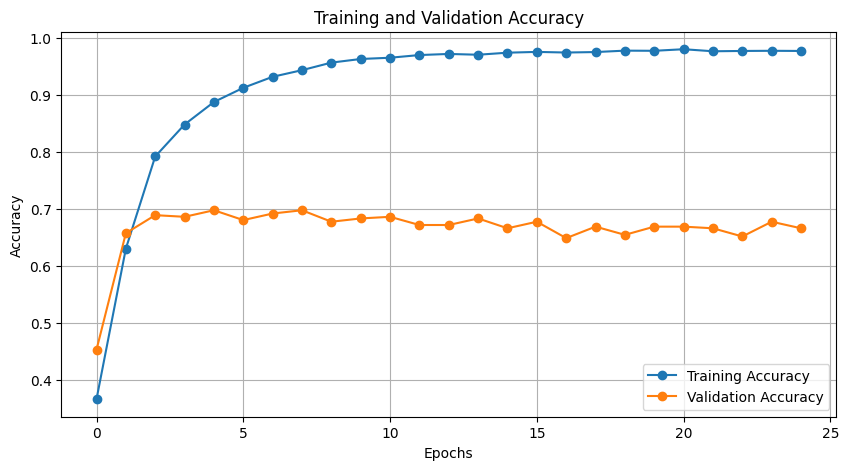

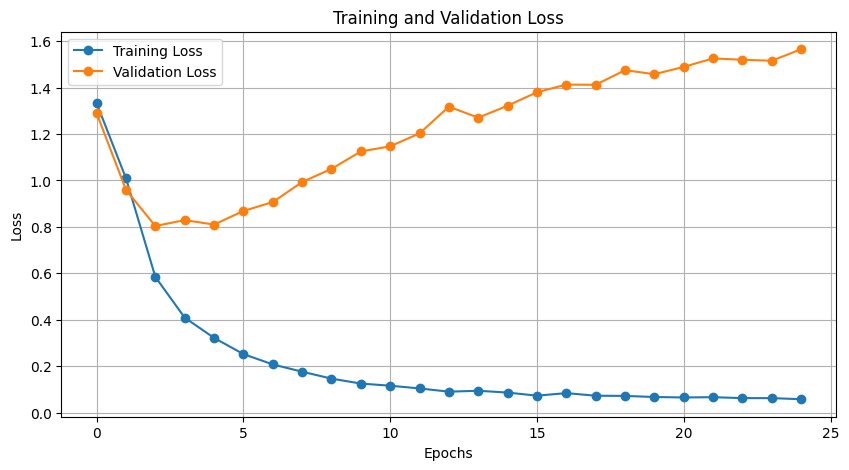

In [ ]:
# Answer here
epochs = training_log['epoch']
accuracy = training_log['accuracy']
val_accuracy = training_log['val_accuracy']
loss = training_log['loss']
val_loss = training_log['val_loss']

# Training 和 Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Training 和 Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Answer here
(1) Training and Validation Accuracy Curve (First Chart):

    The training accuracy increases gradually as the number of training epochs increases, indicating that the model is improving its ability to learn from the training data.
    The validation accuracy slightly improves initially but starts to decline after a few epochs, suggesting that the model's ability to generalize to the validation data is decreasing.
(2) Training and Validation Loss Curve (Second Chart):

    The training loss decreases steadily as the number of epochs increases, showing that the model is fitting the training data better over time.
    The validation loss decreases initially but then increases significantly, indicating that the model is starting to overfit the training data, resulting in worse performance on the validation data.
Overfitting:

    From the charts, we can see that the model achieves high accuracy on the training data but low and declining accuracy on the validation data, which is a typical sign of overfitting.
    In this case, the model is overly focused on memorizing the details and noise in the training data, which prevents it from generalizing well to new, unseen data.
    This is reflected in the loss curves, where the validation loss becomes higher than the training loss and continues to increase as training progresses.
Underfitting:

    If the model shows low accuracy on both the training and validation data or if the loss remains high throughout training, it indicates that the model has not effectively learned patterns from the data, which is underfitting.
    From these charts, there is no evidence of underfitting because the training accuracy is already high.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2266,30262,#Followback Quote_Soup: Be happy not because e...,"[#, Followback, Quote_Soup, :, Be, happy, not,..."
33,10033,Since the 'update' my @iPhone loses power near...,"[Since, the, 'update, ', my, @, iPhone, loses,..."
3192,40365,@mattwruff sadly there is constitutional RIGHT...,"[@, mattwruff, sadly, there, is, constitutiona..."
2270,30266,@KWAYNTjoia it's exhilarating,"[@, KWAYNTjoia, it, 's, exhilarating]"
493,10493,I just don't understand why everyone is so #an...,"[I, just, do, n't, understand, why, everyone, ..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['#', 'Followback', 'Quote_Soup', ':', 'Be', 'happy', 'not', 'because', 'everything', 'is', 'good', ',', 'but', 'because', 'you', 'can', 'see', 'the', 'good', 'side', 'of', 'everything', '.']),
       list(['Since', 'the', "'update", "'", 'my', '@', 'iPhone', 'loses', 'power', 'nearly', '40', '%', 'faster', '.', '#', 'furious']),
       list(['@', 'mattwruff', 'sadly', 'there', 'is', 'constitutional', 'RIGHT', 'to', 'have', 'abortion', '.', 'Yet', 'there', 'is', 'constitutional', 'RIGHT', 'to', 'life', '.', 'Safety', 'net', 'protects', 'those', 'rights'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.80658317,  0.12772426, -0.2811747 ,  0.19298527, -0.080634  ,
       -1.2524678 ,  0.0764466 ,  1.6189613 ,  0.00514404, -0.81725496,
       -0.30134228, -0.67744637, -0.3935836 ,  0.15105174, -0.18656377,
       -0.3551095 ,  0.3707465 , -0.44702297,  0.43879345, -0.9849379 ,
        0.3202686 ,  0.8810698 ,  0.7293634 , -0.00339109,  0.04460553,
       -0.09588456, -0.4138465 ,  0.43694052, -0.4996555 ,  0.24589409,
        0.2722707 ,  0.06050541,  0.6402388 , -0.6598722 , -0.28198862,
        0.39286092,  0.18338424, -0.18326874, -0.01288085, -0.3748826 ,
        0.20804207, -0.08414882, -0.42716444,  0.22973639,  1.2449329 ,
       -0.05074437, -0.9794095 ,  0.16325697,  0.2972952 ,  0.35870147,
       -0.18719433, -0.30356595, -0.22766002, -0.01575169, -0.6534784 ,
       -0.47185653,  0.0948913 ,  0.24294317,  0.05694076,  0.27844822,
        0.18647833,  0.11280016,  0.16490987,  0.0088125 , -0.5589305 ,
        0.33679435,  0.20729768,  0.5043944 , -1.1153545 ,  0.42

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9278621077537537),
 ('bday', 0.9222736954689026),
 ('.\\nA', 0.9100091457366943),
 ('blessing', 0.9048281908035278),
 ('Be', 0.9044914841651917),
 ('independent', 0.90284264087677),
 ("'you", 0.8987659811973572),
 ('nappy', 0.8973507881164551),
 ('dad', 0.8930534720420837),
 ('travel', 0.8911939263343811)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = f"{didiersalazar_google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


# Answer here
1.Replace each word in a sentence with its corresponding word vector and design a mathematical representation, such as using the average or TF-IDF.

2.Use RNN or LSTM.

3.Use a Transformer model.

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ae2eec7bb50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic6.png?raw=true)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic7.png?raw=true)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic9.png?raw=true)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

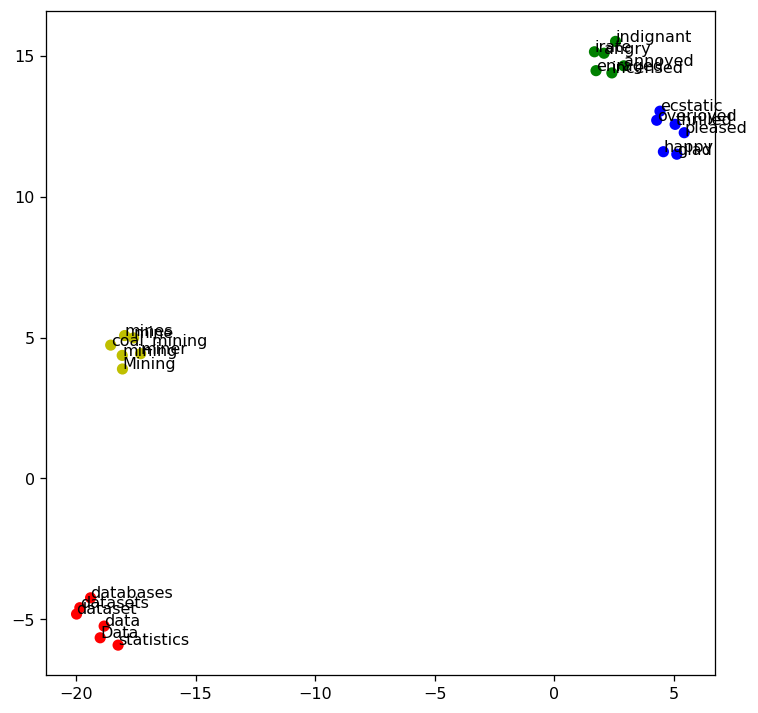

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

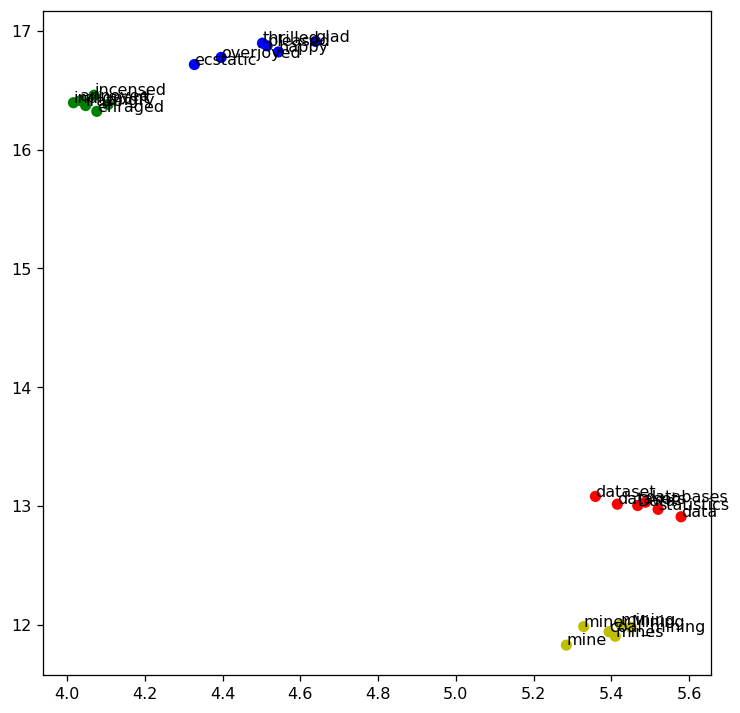

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

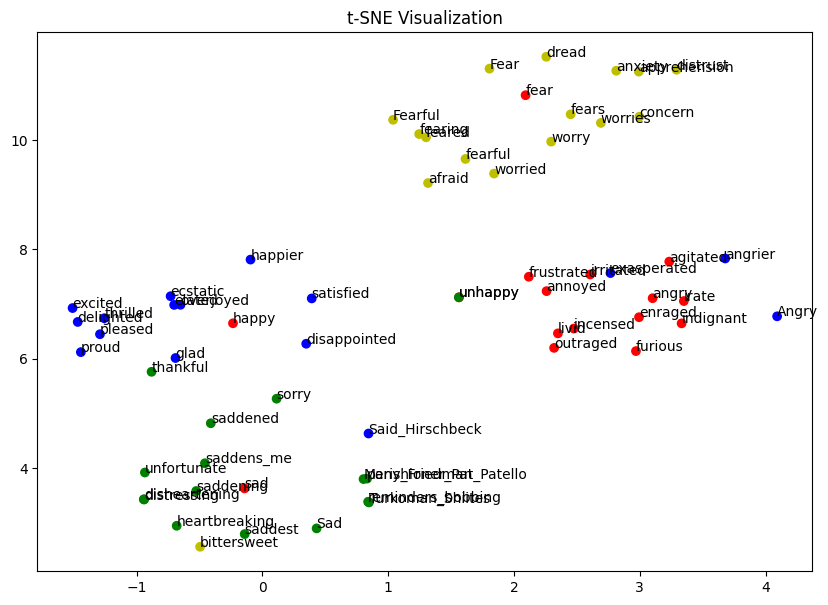

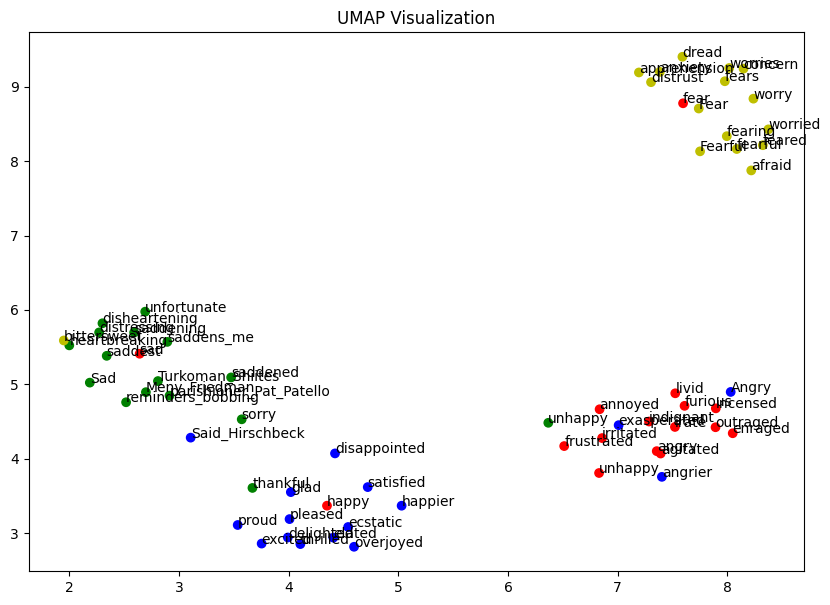

In [ ]:
# Answer here
target_words = ["angry", "happy", "sad", "fear"]

# 找到相關單字
def get_related_words(model, words, topn=15):
    related_words = []
    for word in words:
        related = model.most_similar(word, topn=topn)
        related_words += [word_ for word_, _ in related]
    return words + related_words

# 核心單字
target_words = ["angry", "happy", "sad", "fear"]

# 使用 Word2Vec 模型提取相關單詞
topn = 15
all_words = get_related_words(w2v_google_model, target_words, topn)

# 提取單字的詞嵌入向量
X_train = w2v_google_model[all_words]

# 顏色標籤，用於區分不同核心單詞的相關單字
color = ['r'] * (topn + 1) + ['b'] * (topn + 1) + ['g'] * (topn + 1) + ['y'] * (topn + 1)

# t-SNE
tsne_model = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne_model.fit_transform(X_train)

# UMAP
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

# t-SNE 視覺化
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color)
for label, x, y in zip(all_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("t-SNE Visualization")
plt.show()

# UMAP 視覺化
plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color)
for label, x, y in zip(all_words, X_umap[:, 0], X_umap[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("UMAP Visualization")
plt.show()

Comparison of Results:

t-SNE:

  Focuses more on local structures, with related words clustering more tightly together.
  
  The distances between categories may be less clear, but it is suitable for observing fine-grained semantic relationships.

UMAP:

  Focuses more on global structures, with the relative positions between categories likely to be more accurate.

  Computationally more efficient, making it suitable for large-scale datasets.

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:

![pic10.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic10.png?raw=true)


In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [ ]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques, algorithms, and statistical methods to extract valuable information from raw data.

**Key Characteristics:**

*   **Automated**: Data mining is an automated process that uses software tools and algorithms to discover patterns and relationships in data.
*   **Large-scale**: Data mining typically involves working with large datasets, often containing millions or billions of records.
*   **Pattern discovery**: The goal of data mining is to identify useful patterns, relationships, and insights from the data.

**Types of Data Mining:**

*   **Supervised learning**: In supervised learning, the algorithm is trained on labeled data to learn a mapping between input features and output labels.
*   **Unsupervised learning**: In unsupervised learning, the algorithm is not trained on labeled data and instead discovers patterns and 

**We can use the IPython library to make the response look better:**

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
display(Markdown(response['message']['content']))

**Data Mining**
================

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques, algorithms, and statistical methods to extract valuable information from raw data.

**Key Characteristics:**

*   **Automated**: Data mining is an automated process that uses software tools and algorithms to discover patterns and relationships in data.
*   **Large-scale**: Data mining typically involves working with large datasets, often containing millions or billions of records.
*   **Pattern discovery**: The goal of data mining is to identify useful patterns, relationships, and insights from the data.

**Types of Data Mining:**

*   **Supervised learning**: In supervised learning, the algorithm is trained on labeled data to learn a mapping between input features and output labels.
*   **Unsupervised learning**: In unsupervised learning, the algorithm is not trained on labeled data and instead discovers patterns and relationships in the data.
*   **Semi-supervised learning**: In semi-supervised learning, some of the data is labeled, while the rest is not.

**Data Mining Techniques:**

*   **Clustering**: Clustering groups similar data points together based on their characteristics.
*   **Classification**: Classification predicts a categorical label for new data points based on features and patterns learned from the training data.
*   **Regression**: Regression predicts continuous values for new data points based on features and patterns learned from the training data.

**Applications of Data Mining:**

*   **Marketing analytics**: Data mining helps businesses identify customer behavior, preferences, and trends to improve marketing campaigns.
*   **Customer segmentation**: Data mining enables businesses to segment customers based on their characteristics, behaviors, and preferences.
*   **Predictive maintenance**: Data mining predicts equipment failures, reducing downtime and increasing overall efficiency.

**Data Mining Tools:**

*   **R**: A popular programming language for statistical computing and data visualization.
*   **Python**: A versatile programming language used in data mining, machine learning, and data science applications.
*   **SPSS**: A software package for statistical analysis and data visualization.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

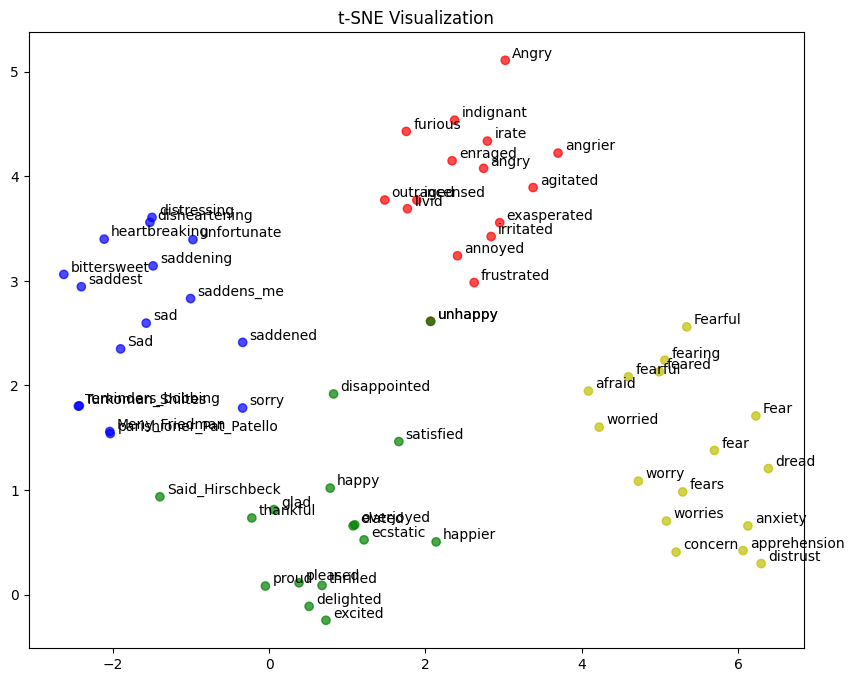

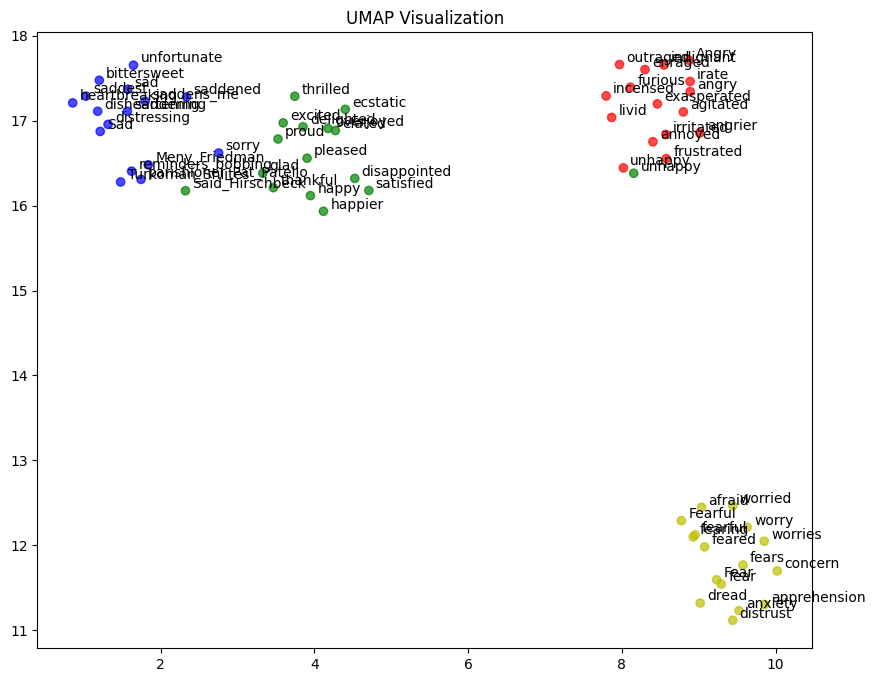

In [ ]:
# Answer here
target_words_list = ["angry", "happy", "sad", "fear"]
topn = 15
word_groups = {}

for word in target_words_list:
    word_groups[word] = [word] + [w for w, _ in w2v_google_model.most_similar(word, topn=topn)]

target_words = []
color_labels = []
colors = ['r', 'g', 'b', 'y']

for i, word in enumerate(target_words_list):
    target_words.extend(word_groups[word])
    color_labels.extend([colors[i]] * (topn + 1))

X_target = w2v_google_model[target_words]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_target)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_labels, alpha=0.7)
for label, x, y in zip(target_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title("t-SNE Visualization")
plt.show()

umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_target)

plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color_labels, alpha=0.7)
for label, x, y in zip(target_words, X_umap[:, 0], X_umap[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title("UMAP Visualization")
plt.show()

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example1.png?raw=true)

source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example2.jpg?raw=true)

source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [ ]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'{didiersalazar_pictures_path}/pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image captures a delightful scene of a Shiba Inu dog in mid-jump on a lush green lawn. The dog, with its tan and white fur, appears to be frozen in time as it leaps into the air, mouth open in what seems like a playful yip. Its pink tongue is visible, adding to the sense of motion captured in this snapshot. The background, blurred due to the focus on the dog, gives the impression of trees and shrubs lining the lawn, providing a serene backdrop to this joyful moment. The image does not contain any discernible text. The relative position of the objects suggests that the dog is at the center of this scene, with the green lawn spread out beneath it and the trees in the distance behind it.

In [ ]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'{didiersalazar_pictures_path}/pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image features a **gray tabby cat** standing on its hind legs with its front paws up in the air. The cat's tail is raised, and it appears to be looking directly at the camera. The background of the image is a solid light gray color. This photo was taken against a white wall or backdrop. The cat is the only object in the frame, and there are no other discernible details or objects present.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive


/content/drive/MyDrive


In [ ]:
ls

'Colab Notebooks'/   ubuntu711/   window711/   window_home/   window_laptop/


In [ ]:
cd Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Answer here
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'DMAS2/pics/1732107989260.png'] #Image with the cat
    },
])

display(Markdown(response4['message']['content']))

```php
<img src="https://i.imgur.com/RlX2pJt.png" alt="A cartoon man in a pink shirt with his tongue out. He has glasses on and is holding an anchor above his head." width="300">
```

    The description is inaccurate; the character in my image is Patrick Star, not SpongeBob

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

The related solutions of IBM with LLMs include:

1. Watsonx Assistant: A conversational AI platform that uses the Granite model series as its generative AI backbone.
2. Watsonx Orchestrate: An AI orchestration platform that leverages the Granite model series for task automation and workflow optimization.
3. watsonx.ai: IBM's cloud-based platform for building, deploying, and managing LLMs like the Granite model series.

These solutions demonstrate IBM's commitment to integrating its LLM capabilities into various products and services to enhance NLU and content generation capabilities across different business functions and use cases.


### **Actual content in the URL:**
![pic11.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic11.png?raw=true)

source: https://www.ibm.com/topics/large-language-models


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here
def load_and_retrieve_docs(urls):
    all_splits = []
    for url in urls: #multiple URLs
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()  # Load the URL content
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)  # Split content into chunks
        splits = text_splitter.split_documents(docs)
        all_splits.extend(splits)  # Combine splits from all URLs

    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings
    vectorstore = Chroma.from_documents(documents=all_splits, embedding=embeddings)  # Create vector space
    return vectorstore.as_retriever()
urls = [
    "https://www.wix.com/encyclopedia/definition/artificial-intelligence?utm_source=google&utm_medium=cpc&utm_campaign=21365765164^168955187411^search%20-%20dsa&experiment_id=^^701641878127^&gad_source=1&gclid=Cj0KCQiA0fu5BhDQARIsAMXUBOK69nmCqSwstbcttGti28h800eIn9HCDfSUvrDIriZydcUo6lh730UaAgoFEALw_wcB",
    "https://www.ibm.com/topics/artificial-intelligence",
    "https://www.techtarget.com/searchenterpriseai/definition/AI-Artificial-Intelligence"
]

# Create the retriever using multiple URLs
retriever = load_and_retrieve_docs(urls)

# Format documents into context for the LLM
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model=llm_model, messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Test the RAG chain with a question
result = rag_chain("What is AI ?")
display(Markdown(result))

Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that would typically require human intelligence, such as learning, reasoning, problem-solving, and creativity. This includes various aspects like:

1. Learning: acquiring data and creating rules (algorithms) to transform it into actionable information.
2. Reasoning: choosing the right algorithm to reach a desired outcome.
3. Self-correction: continuously learning and tuning itself to provide accurate results.
4. Creativity: generating new images, text, music, ideas, etc., using techniques like neural networks and rule-based systems.

AI has numerous applications in various fields, including:

1. Natural Language Processing (NLP): understanding, generating, and processing human language.
2. Computer Vision: analyzing and interpreting visual data from images and videos.
3. Robotics: creating intelligent machines that can interact with and adapt to their environment.

The goal of AI is to create systems that can augment human capabilities, making them more efficient, effective, and accessible.

I think the reply generated this time is not very good because the context and context between paragraphs are not smooth.

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [ ]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [ ]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,text_tokenized,embeddings
2266,30262,#Followback Quote_Soup: Be happy not because e...,joy,0.583,"[#, Followback, Quote_Soup, :, Be, happy, not,...","[-1.0257763862609863, 0.9595080614089966, -1.8..."
33,10033,Since the 'update' my @iPhone loses power near...,anger,0.792,"[Since, the, 'update, ', my, @, iPhone, loses,...","[0.10149423778057098, 1.8023993968963623, 3.36..."
3192,40365,@mattwruff sadly there is constitutional RIGHT...,sadness,0.514,"[@, mattwruff, sadly, there, is, constitutiona...","[0.2151644229888916, 1.0017462968826294, 4.296..."
2270,30266,@KWAYNTjoia it's exhilarating,joy,0.583,"[@, KWAYNTjoia, it, 's, exhilarating]","[-1.4177969694137573, -0.01914728246629238, 3...."
493,10493,I just don't understand why everyone is so #an...,anger,0.458,"[I, just, do, n't, understand, why, everyone, ...","[-0.09302842617034912, 0.7677693963050842, -0...."
...,...,...,...,...,...,...
3097,40270,"One step forward, two steps backward, the link...",sadness,0.583,"[One, step, forward, ,, two, steps, backward, ...","[-0.8074842095375061, -0.22907894849777222, 2...."
3043,40216,@TaylaStJames it happens and Vegas isn't the o...,sadness,0.625,"[@, TaylaStJames, it, happens, and, Vegas, is,...","[-1.3838831186294556, -0.30141550302505493, 0...."
2173,30169,Getting cable hooked up in new place just in t...,joy,0.667,"[Getting, cable, hooked, up, in, new, place, j...","[-1.7363022565841675, 0.9845574498176575, -0.8..."
2695,30691,Doesn't it just suck when you're so real to so...,joy,0.279,"[Does, n't, it, just, suck, when, you, 're, so...","[-2.4667439460754395, 1.5636770725250244, 4.33..."


In [ ]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
17,10874,@__NETFLIXNCHILL I fuck with madden way harder,anger,0.521,"[-0.8171495795249939, 1.7331408262252808, 3.26..."
195,30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700,"[-0.4123469591140747, 1.1391232013702393, 1.30..."
243,30872,@hesham786 that's the spirit,joy,0.354,"[-1.3418169021606445, 0.36706623435020447, 1.5..."
207,30836,@Geminiak @LondonNPC you're welcome! #wordgeek...,joy,0.646,"[-1.7055935859680176, 1.680854082107544, -0.21..."
177,21240,Tweeting from the sporadic wifi on the tube #p...,fear,0.434,"[0.5102130174636841, 2.1052181720733643, 1.231..."
...,...,...,...,...,...
266,30895,@PhilGlutting Hey There Phil Glutting thank yo...,joy,0.646,"[-1.0161508321762085, -1.0372841358184814, 0.6..."
222,30851,Heather that was #hilarious! @MsHeatherBates @...,joy,0.812,"[-0.38435712456703186, 0.3815591335296631, -0...."
96,21159,@fatgirlhealthy @MBSCBILL ....so that what do ...,fear,0.667,"[0.016869384795427322, -0.20760732889175415, 0..."
289,40802,"[ @HedgehogDylan ] *she would frown a bit, fol...",sadness,0.562,"[-0.5276620388031006, 1.1990094184875488, 0.19..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [ ]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.4553314121037464


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.45      0.43        84
        fear       0.50      0.52      0.51       110
         joy       0.45      0.42      0.43        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.45       347



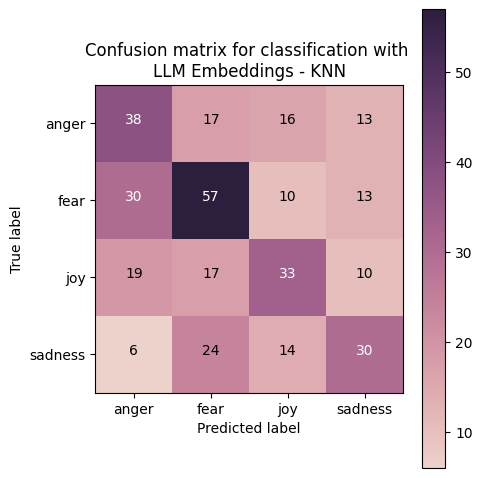

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [ ]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [ ]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [ ]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [ ]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [ ]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [ ]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [ ]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.4059 - loss: 1.3439 - val_accuracy: 0.5245 - val_loss: 1.1439
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6621 - loss: 0.8503 - val_accuracy: 0.5937 - val_loss: 1.0372
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7509 - loss: 0.6484 - val_accuracy: 0.5937 - val_loss: 1.0982
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8133 - loss: 0.5026 - val_accuracy: 0.5620 - val_loss: 1.1642
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8399 - loss: 0.4125 - val_accuracy: 0.5793 - val_loss: 1.3638
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8707 - loss: 0.3541 - val_accuracy: 0.5850 - val_loss: 1.3226
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9054 - loss: 0.2915 - val_accuracy: 0.5591 - val_loss: 1.4808
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9232 - loss: 0.2317 - val_accuracy: 0

In [ ]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


array([[9.99972463e-01, 1.13293879e-06, 2.62916092e-05, 1.03950974e-07],
       [3.25141191e-01, 3.31223726e-01, 4.51027873e-08, 3.43635023e-01],
       [5.42673647e-01, 4.54998195e-01, 2.27145292e-03, 5.67492061e-05],
       [1.96093279e-05, 9.23281386e-02, 8.43362272e-01, 6.42900094e-02],
       [1.02475872e-06, 1.86496146e-03, 6.73837253e-09, 9.98133957e-01]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'sadness', 'anger', 'joy', 'sadness'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.58


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.490451,1.181067,0.524496,1.143903
1,1,0.658179,0.840817,0.593660,1.037241
2,2,0.735954,0.668837,0.593660,1.098173
3,3,0.789095,0.549512,0.561960,1.164156
4,4,0.826183,0.438093,0.579251,1.363765
5,5,0.850263,0.397681,0.585014,1.322575
6,6,0.886521,0.320962,0.559078,1.480833
7,7,0.903681,0.264764,0.553314,1.506212
8,8,0.919457,0.231162,0.538905,1.750479
9,9,0.942153,0.169968,0.567723,1.915203


In [ ]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.59      0.60      0.59        84
        fear       0.65      0.72      0.68       110
         joy       0.65      0.44      0.53        79
     sadness       0.44      0.51      0.47        74

    accuracy                           0.58       347
   macro avg       0.58      0.57      0.57       347
weighted avg       0.59      0.58      0.58       347



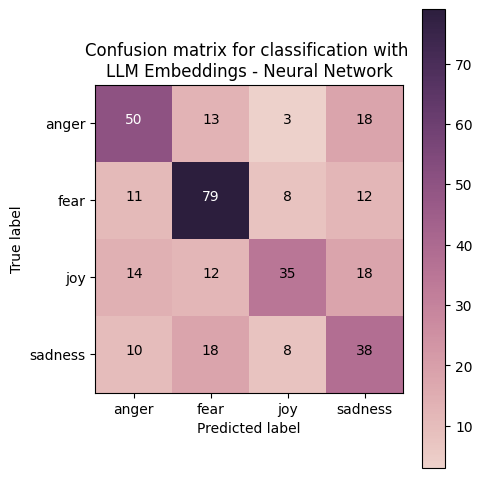

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

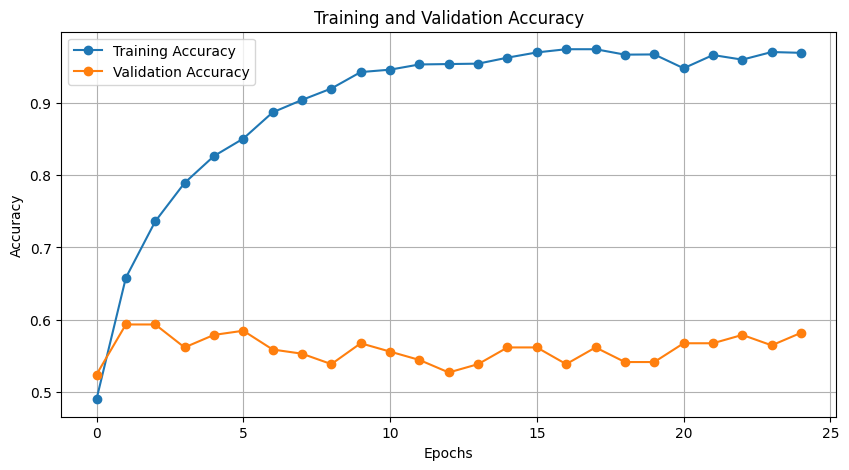

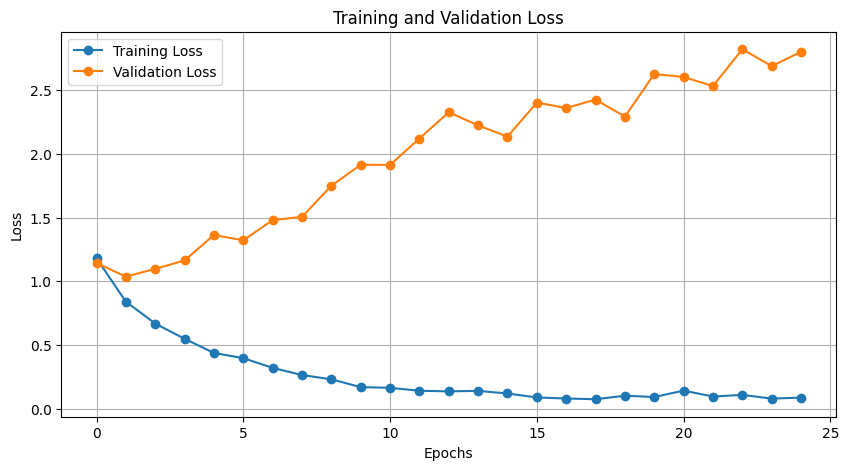

In [ ]:
# Answer here
epochs = training_log['epoch']
accuracy = training_log['accuracy']
val_accuracy = training_log['val_accuracy']
loss = training_log['loss']
val_loss = training_log['val_loss']

# Training 和 Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Training 和 Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

KNN Results Features

    Accuracy Performance:

        The accuracy of KNN on training data is typically high because KNN relies on nearest neighbor samples for classification, which may lead to overfitting the training data.

        Validation accuracy is often lower, indicating limited generalization ability to unseen data.

    Loss Curve:

        The loss curve trend may show little variation, as KNN does not rely on gradient descent or loss function optimization.

        Loss values may not effectively represent the learning progress of the model.

Neural Network Results Features

    Accuracy Performance:

        The training accuracy of neural networks gradually increases and stabilizes, demonstrating the model's ability to learn features from   the data.

        Validation accuracy tends to be lower and exhibits fluctuations, possibly due to overfitting or insufficient data.

    Loss Curve:

        Training loss decreases rapidly, indicating that the model is learning effectively.

        Validation loss increases with more epochs, which might suggest signs of overfitting.

Advantages of Using LLM Embeddings

    Feature Representation:

        LLM (e.g., Transformer-based models) embeddings provide richer feature representations, mapping raw data into high-dimensional semantic spaces.

        Such feature representations are better suited for neural networks, as they capture deeper data structures.

    Enhanced Generalization:

        LLM embeddings are often learned through large-scale corpora and possess strong generalization capabilities, resulting in higher validation accuracy.

    Reduced Manual Feature Engineering:
    
        Traditional models (e.g., KNN) typically require manually designed features, while LLM embeddings automatically generate efficient and information-rich features.

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [ ]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Accuracy: 42.50%
              precision    recall  f1-score   support

       anger       0.47      0.75      0.58        20
        fear       0.29      0.10      0.15        20
         joy       0.40      0.60      0.48        20
     sadness       0.45      0.25      0.32        20

    accuracy                           0.42        80
   macro avg       0.40      0.42      0.38        80
weighted avg       0.40      0.42      0.38        80



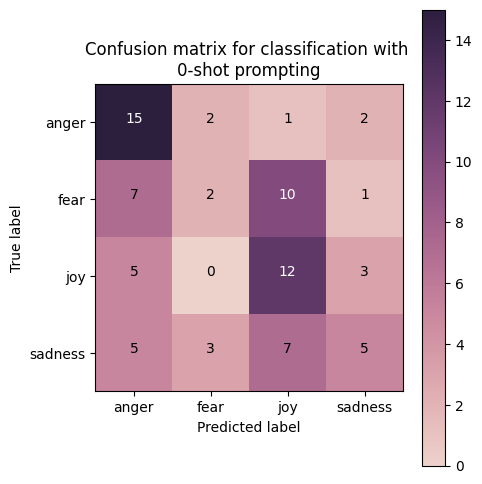

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @GroupAnon black armed thug with a record carrying gun illegally gets shot by black cop. #outrage   This is a joke.Let em destroy their town
Emotion: anger

Text: @SusannahSpot I could pop round #nightmare
Emotion: fear

Text: A joyous first webiversary/web mitzvah to Smithsonian's @WeiPoints!! @brianwolly @jackie_mansky @bethpylieberman @bilbo @mazeltov
Emotion: joy

Text: I wanna see you smile I don't wanna see you make a frown
Emotion: sadness


Accuracy: 43.75%
              precision    recall  f1-score   support

       anger       0.40      0.85      0.54        20
        fear       0.67      0.10      0.17        

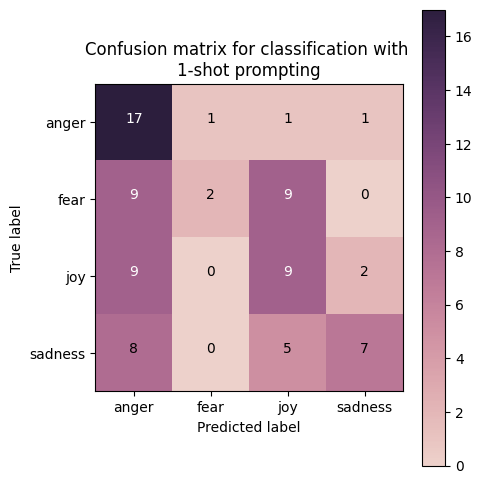

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @GroupAnon black armed thug with a record carrying gun illegally gets shot by black cop. #outrage   This is a joke.Let em destroy their town
Emotion: anger

Text: i love that tay &amp; tiff are just sitting at my house while i'm at work 🙃
Emotion: anger

Text: @BIGGKATZ BUT arms (focused rage) is overpowered, it will be getting nerfed. It'll still be stronger than fury though
Emotion: anger

Text: Skipping meals is the national way of showing #disappointment and #anger. #wiz
Emotion: anger

Text: Wrinkles should merely hide where frown have been.  - Mark Twain
Emotion: anger

Text: @SusannahSpot I could pop round #nightmar

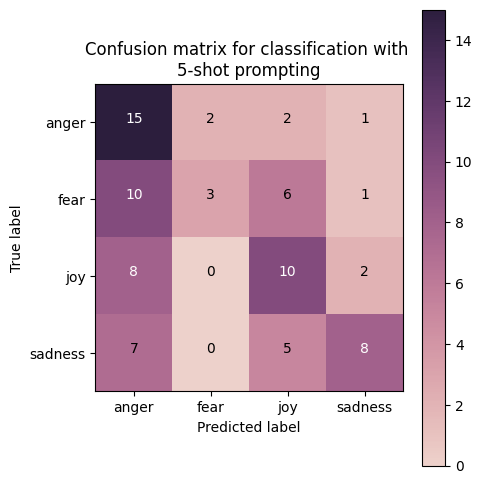

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

# Answer here
Zero-Shot Classification

Key Observations:

    The performance on the anger and joy categories is relatively better compared to others.
    Significant confusion is observed between fear and sadness, with the model struggling to differentiate between the two.
    Overall classification accuracy is low, with many misclassifications visible in the off-diagonal entries of the confusion matrix.
Reason:
    Zero-shot classification entirely relies on the pre-trained knowledge of the model without leveraging any task-specific examples or context.

1-Shot Classification

Key Observations:

    After providing one example, the accuracy for the anger category improves, with fewer misclassifications.
    There is a slight improvement in the accuracy of fear and sadness, although some confusion still persists (e.g., fear is often misclassified as other emotions).
    
    Overall accuracy is higher compared to zero-shot, but the improvement is relatively limited.

Reason:
    
    A single example gives the model an initial task context, but the number of examples is insufficient to fully cover the characteristics of
    each category.

5-Shot Classification

Key Observations:
    The anger category achieves 100% accuracy, with all samples correctly classified.

    Significant improvement is observed for the joy category as well, though fear and sadness still show some misclassifications.
    
    This approach achieves the highest overall accuracy, indicating that more examples significantly enhance the model’s classification capability.
Reason:
    Five examples provide a richer context, enabling the model to better understand the features of each category.

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---